SLP with stopping criteria

Training stopped after 15 iterations (no weight changes for 10 iterations).
Optimized Weights: [0.02 0.01], Bias: -0.03
Predictions: [0 0 0 1]


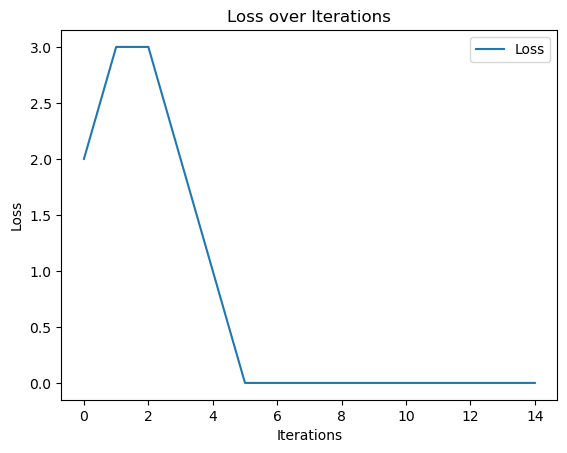

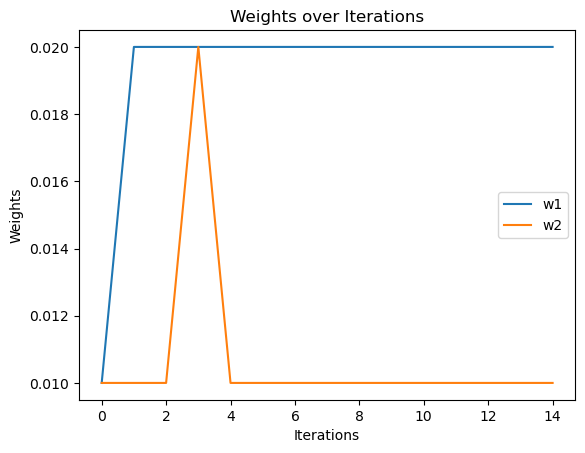

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([0, 0, 0, 1])

# Learning rate
lr = 0.01

class SLP:
    def __init__(self, lr):
        self.lr = lr

    def fit(self, X, Y, max_epochs=10000):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.All_loss = []  # Stores loss for each epoch
        self.Weights1 = []  # Stores w1 for each epoch
        self.Weights2 = []  # Stores w2 for each epoch

        unchanged_count = 0  # Counts consecutive epochs with no weight changes
        prev_weights = self.weights.copy()

        epoch = 0
        while epoch < max_epochs:
            total_loss = 0
            for j in range(X.shape[0]):
                y_pred = self.Activation_F(np.dot(self.weights, X[j]) + self.bias)
                error = Y[j] - y_pred
                self.weights += self.lr * error * X[j]
                self.bias += self.lr * error
                total_loss += error ** 2

            # Save weight history
            self.Weights1.append(self.weights[0])
            self.Weights2.append(self.weights[1])
            
            # Save loss
            self.All_loss.append(total_loss)

            # Check if weights have changed
            if np.array_equal(prev_weights, self.weights):
                unchanged_count += 1
            else:
                unchanged_count = 0

            # Update previous weights
            prev_weights = self.weights.copy()

            # Stop if weights haven't changed for 10 iterations
            if unchanged_count >= 10:
                print(f"Training stopped after {epoch + 1} iterations (no weight changes for 10 iterations).")
                break

            epoch += 1
        
        print(f"Optimized Weights: {self.weights}, Bias: {self.bias}")

    def Activation_F(self, activation):
        return 1 if activation >= 0 else 0

    def Prediction(self, X):
        sum = np.dot(X, self.weights) + self.bias
        return np.array([self.Activation_F(s) for s in sum])

# Initialize and train the SLP
slp = SLP(lr=lr)
slp.fit(X, Y)

# Make predictions
predictions = slp.Prediction(X)
print("Predictions:", predictions)

# Plot loss over iterations
plt.plot(range(len(slp.All_loss)), slp.All_loss, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.show()

# Plot weights over iterations
plt.plot(range(len(slp.Weights1)), slp.Weights1, label='w1')
plt.plot(range(len(slp.Weights2)), slp.Weights2, label='w2')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Weights over Iterations')
plt.legend()
plt.show()
